In [5]:

import os
import pathlib
import urllib.request
from dotenv import load_dotenv
import pandas as pd

#Para cargar el archivo. Se necesita un .env con el path definido para la carpeta correspondiente.
load_dotenv()
csv_path = pathlib.Path(os.environ["DATA_DIR"]) / "grades.csv"

df_students = pd.read_csv(csv_path, delimiter=",", header="infer")
df_students=df_students.dropna(axis=0, how='any')

passes= pd.Series(df_students['Grade']>=60)

df_students=pd.concat([df_students, passes.rename("Pass")],axis=1)

print(df_students)



         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True


Now, let's use Matplotlib for plotting graphics and analizying results

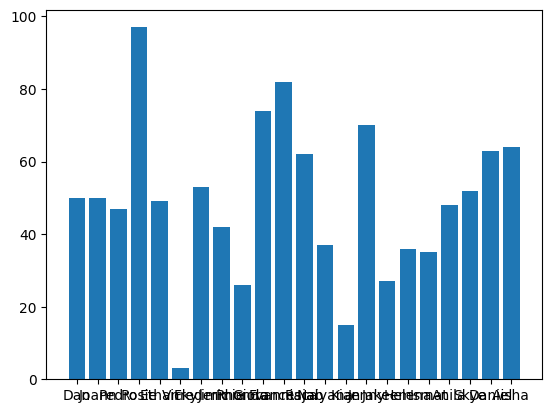

In [6]:
from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade);
plt.show()

The names are overlapping. We can adjust that configuring our figure. Specifically, using a figure size:

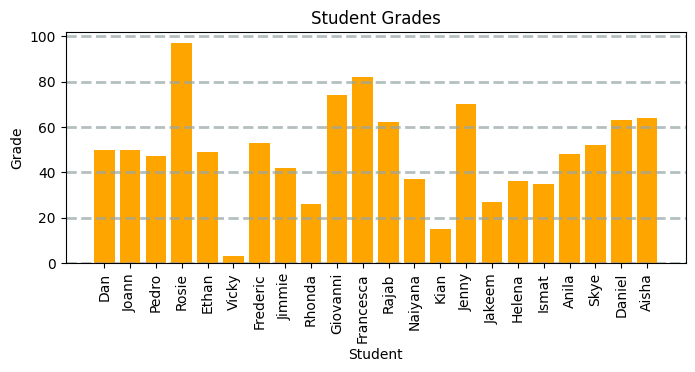

In [7]:
ig=plt.figure(figsize=(8,3))

plt.bar(x=df_students.Name, height=df_students.Grade,color='orange')

plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

plt.xticks(rotation=90)

plt.show()

Now, lets try making two different graphics in one plot:

C:\Users\Salis\AppData\Local\Temp\ipykernel_3320\3168572294.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  aux[0].set_xticklabels(df_students.Name, rotation=90)
C:\Users\Salis\AppData\Local\Temp\ipykernel_3320\3168572294.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


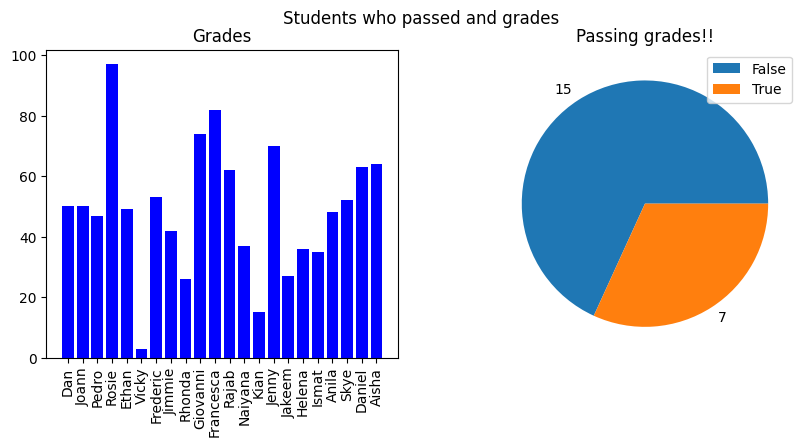

In [11]:
fig, aux=plt.subplots(1,2, figsize=(10,4))

######Bar plot
aux[0].bar(x=df_students.Name, height=df_students.Grade, color="blue")
aux[0].set_title("Grades")
aux[0].set_xticklabels(df_students.Name, rotation=90)


#Pie Chart
pass_counts=df_students["Pass"].value_counts()

aux[1].pie(pass_counts, labels=pass_counts)
aux[1].set_title("Passing grades!!")
aux[1].legend(pass_counts.keys().tolist())

##title
fig.suptitle("Students who passed and grades")

fig.show()

<Axes: xlabel='Name'>

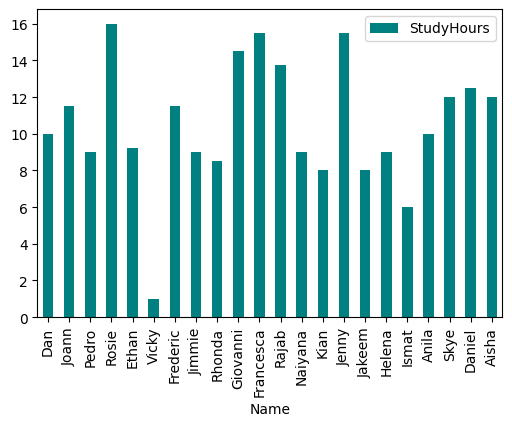

In [ ]:
#Using pandas for plotting. I remember nelson told us about another plotting library which is interactive

df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

Now, for analyzing data. Descriptive statistics and data distribution

C:\Users\Salis\AppData\Local\Temp\ipykernel_3320\2933921289.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


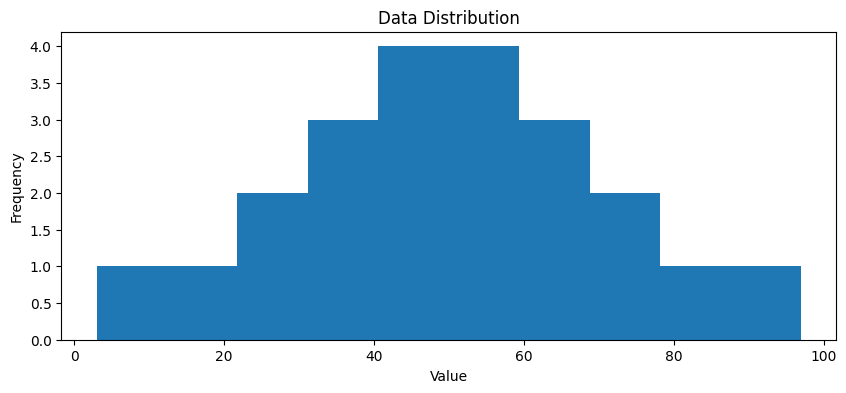

In [13]:
var_data = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

Es simétrico. la data tiende a ubicarse en la mitad. No presenta sesgo.

In [14]:
# Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



We calculate the minimum, the mean and the median

"To understand the distribution better, we can examine so-called measures of central tendency, which is a fancy way of describing statistics that represent the "middle" of the data. "

C:\Users\Salis\AppData\Local\Temp\ipykernel_3320\2387795004.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


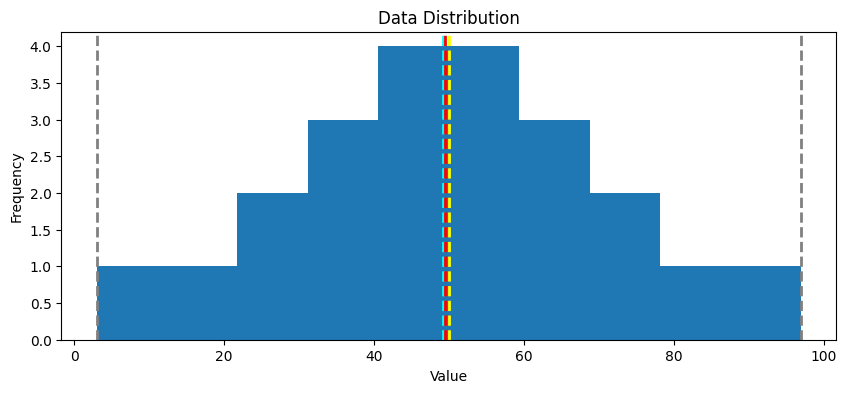

In [15]:
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

The mean, the median and the mode are around 50

The mean: A simple average based on adding together all of the values in the sample set and then dividing the total by the number of samples.
The median: The value in the middle of the range of all of the sample values.
The mode: The most commonly occurring value in the sample set***


***Of course, in some sample sets, there might be a tie for the most common value. In those cases, the dataset is described as bimodal or even multimodal.


We can use a box and whiskers plot to visualize the distribution

C:\Users\Salis\AppData\Local\Temp\ipykernel_3320\4088679524.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


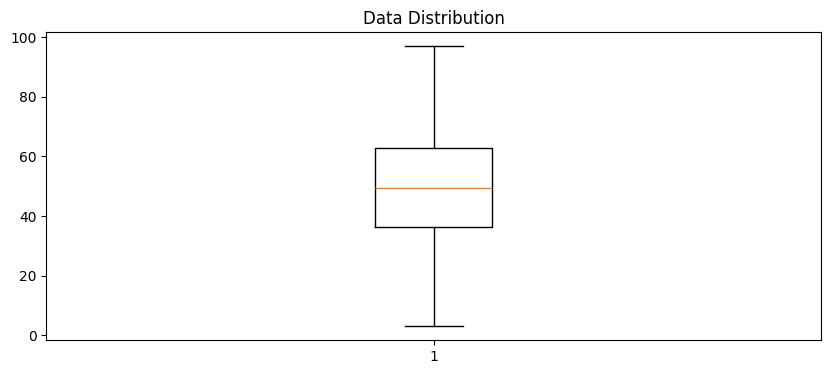

In [16]:
# Get the variable to examine
var = df_students['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

The box shows the inner two quartiles of the data. The whiskerts extending the box shows the other two quartiles.


"In some ways, it's helpful to think of the histogram as a "front elevation" view of the distribution, and the box plot as a "plan" view of the distribution from above"

Now, we combine the two of them

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\Salis\AppData\Local\Temp\ipykernel_3320\1918122812.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


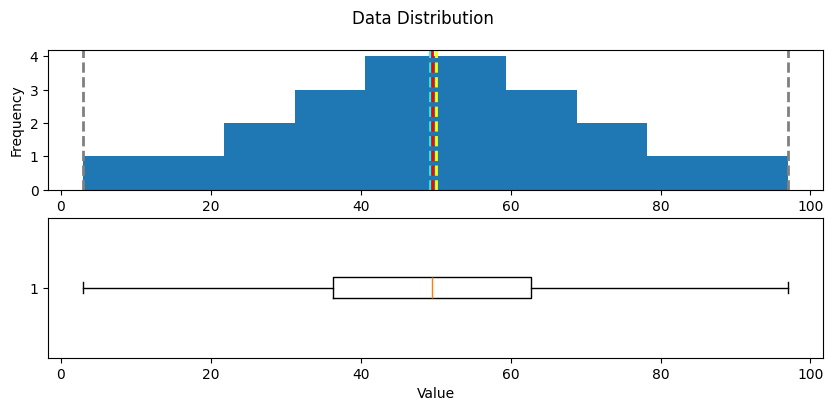

In [17]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

"If we have enough samples, we can calculate something called a probability density function, which estimates the distribution of grades for the full population."

In [20]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade


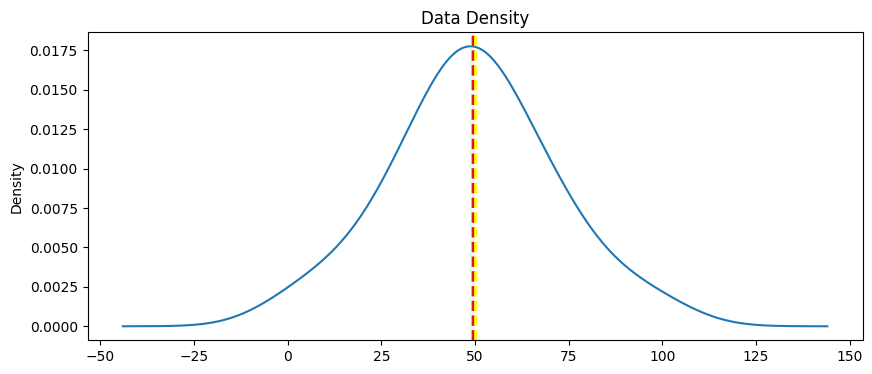

In [23]:
col = df_students['Grade']
show_density(col)

Normal distribution (we use the bell for determining that)

In [ ]:
#%pip install --quiet scipy
#if you dont have scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
